<a href="https://colab.research.google.com/github/Giuseppe86-lab/Cross-Selling-di-polizze-assicurative-/blob/main/Cross_selling_polizze_assicurative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Esplorazione del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [2]:
URL = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/insurance_cross_sell.csv'
df = pd.read_csv(URL, index_col=0)
print(df.shape)
df.head()

(381109, 11)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In questo dataset abbiamo 381109 samples, 10 feature e una variabile target (**Response**)

1. **Gender**: variabile qualitativa categorica che indica il sesso del cliente.
2. **Age**: variabile quantitativa continua che indica l'età del cliente.
3. **Driving_License**: variabile qualitativa categorica che indica se il cliente possiede la patente.
4. **Region_Code**: variabile qualitativa categorica che indica la regione di residenza del cliente.
5. **Previously_Insured**: variabile qualitativa categorica che indica se il cliente ha già un veicolo assicurato.
6. **Vehicle_Age**: variabile qualitativa ordinale che indica l'età del veicolo.
7. **Vehicle_Damage**: variabile qualitativa categorica che indica se il cliente ha avuto incidenti o danni al veicolo in passato.
8. **Annual_Premium**: variabile quantitativa continua che indica l'importo annuale pagato dal cliente.
9. **Policy_Sales_Channel**: variabile qualitativa categorica che indica il canale utilizzato per la vendita.
10. **Vintage**: variabile quantitativa continua che indica da quanti giorni il cliente è assicurato con **AssurePredict**.
11. **Response**: variabile target che indica se il cliente ha accettato (1) o meno (0) la proposta, questo caratterizza il nostro problema come un problema di **classificazione**.

L'obiettivo del progetto è sviluppare un **modello di machine learning** che preveda se i clienti, che attualmente hanno una assicurazione saniataria, potrebbero essere intaressati a sottoscrivere una polizza assicurativa per il loro veicolo.


## 1.1 Caratteristiche generali del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


Nel nostro dataset sono presenti feature di vario tipo:

- **int**: Age, Driving_License, Previously_Insured, Vintage, Response
- **float**: Region_Code, Annual_Premium, Policy_Sales_Channel
- **object**: Gender, Vehicle_Age, Vehicle_Damage

È importante andare a osservare il tipo delle feature perché in base alle loro caratteristiche e tipologie dovremmo svolgere delle diverse analisi esplorative. Le informazioni ottenute con *df.info()* ci dicono anche che nel nostro dataset non ci sono valori mancanti.

In [29]:
duplicate_rows = df.duplicated()

duplicates = df[df.duplicated()]
print(duplicates)

        Gender  Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                      
35755     Male   23                1         15.0                   0   
41516     Male   39                1         30.0                   0   
43619     Male   40                1         28.0                   1   
44050     Male   39                1         28.0                   0   
44204     Male   44                1         28.0                   0   
...        ...  ...              ...          ...                 ...   
379274    Male   58                1         30.0                   1   
379452    Male   41                1         30.0                   0   
379789    Male   38                1         28.0                   1   
380674  Female   37                1         28.0                   0   
380719  Female   35                1         30.0                   1   

       Vehicle_Age Vehicle_Damage  Annual_Premium 

Nel nostro dataset ci sono un totale di 269 duplicati su 381109 ioè lo 0.07%, non potendo verificare la loro correttezza decido di eliminarli per pulire il dataset.

In [31]:
df= df.drop_duplicates()

In [32]:
df[['Age', 'Annual_Premium', 'Vintage']].describe()

,Age,Annual_Premium,Vintage
count,380840.000000,380840.000000,380840.000000
mean,38.823593,30584.016078,154.344607
std,15.513206,17203.258664,83.670240
min,20.000000,2630.000000,10.000000
25%,25.000000,24426.000000,82.000000
50%,36.000000,31678.500000,154.000000
75%,49.000000,39408.000000,227.000000
max,85.000000,540165.000000,299.000000


In [33]:
df.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,380840,380840,380840
unique,2,3,2
top,Male,1-2 Year,Yes
freq,205938,200167,192277


In [34]:
df['Region_Code'].value_counts().sort_index()

,count
Region_Code,
0.0,2015
1.0,1006
2.0,4037
3.0,9245
4.0,1798
5.0,1279
6.0,6277
7.0,3275
8.0,33857


Avendo 52 codici probabilmente ogni numero è associato ad uno Stato degli Stati Uniti d'America visto che il dataset sembra essere di quel paese.

In [35]:
df['Policy_Sales_Channel'].value_counts().sort_index()

,count
Policy_Sales_Channel,
1.0,1074
2.0,4
3.0,523
4.0,509
6.0,3
...,...
157.0,6677
158.0,492
159.0,51


Le due feature **Region_Code** e **Policy_Sales_Channel** sono due categoriche con molti canali avranno bisogno di una rappresentazione a parte per poter mettere in evidenza tutte le loro classi.

## 1.2 Analisi Univariata

In questa fase andiamo a studiare le distribuzioni delle singole feature.

Per le variabile categoriche realizziamo dei grafici a barre per vedere la distribuzione delle diverse classi, se sono o meno equamente rappresentate.

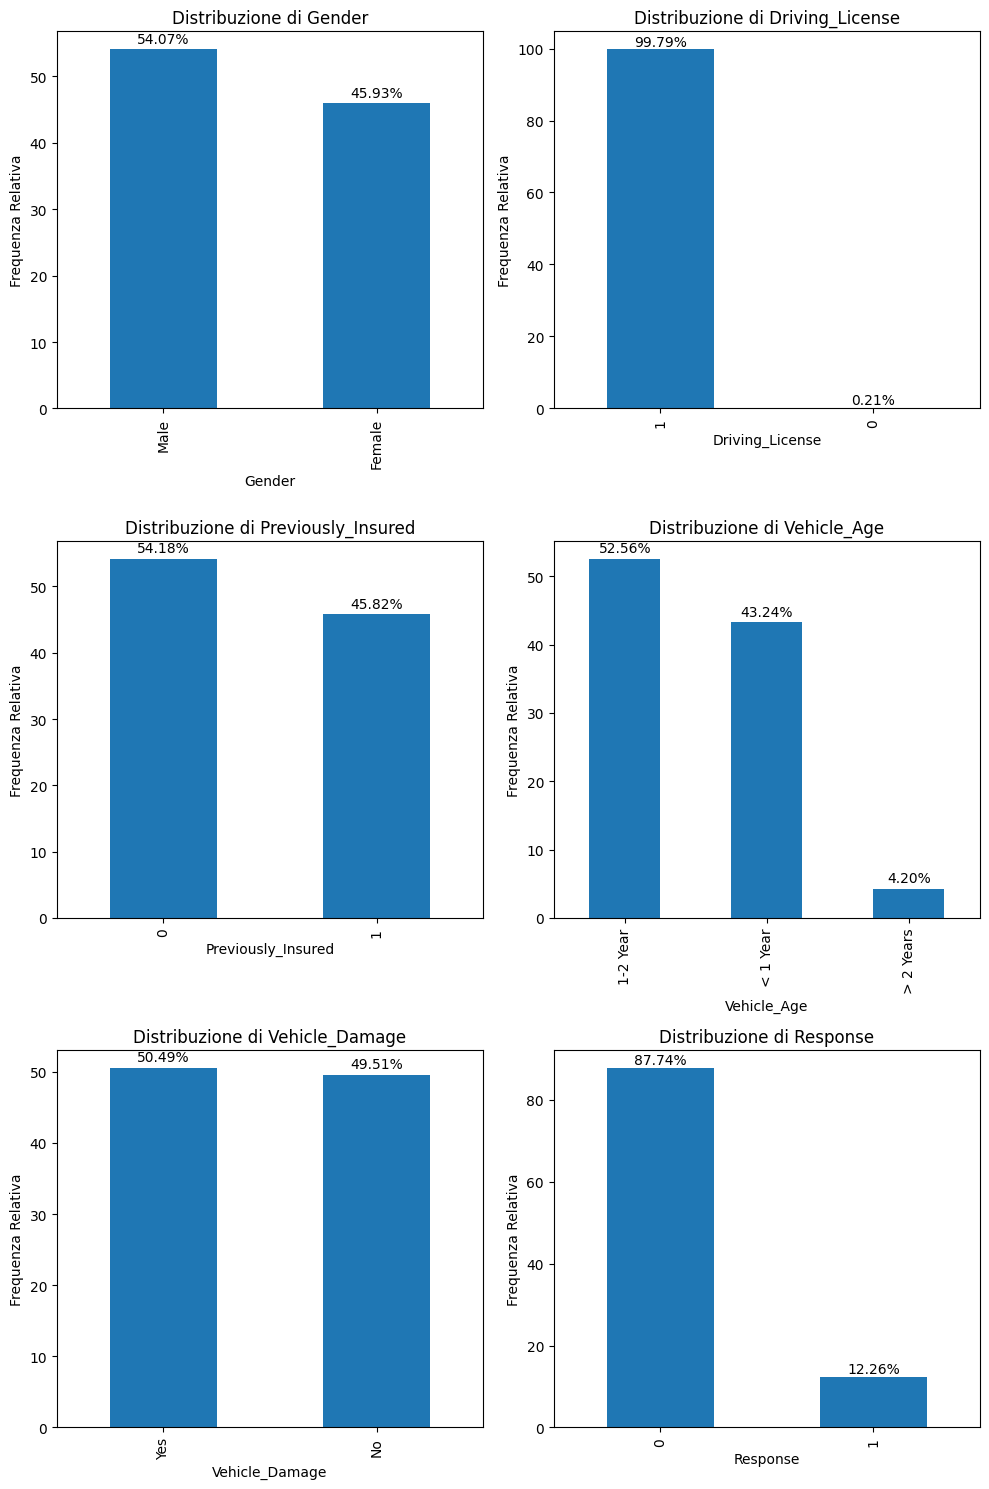

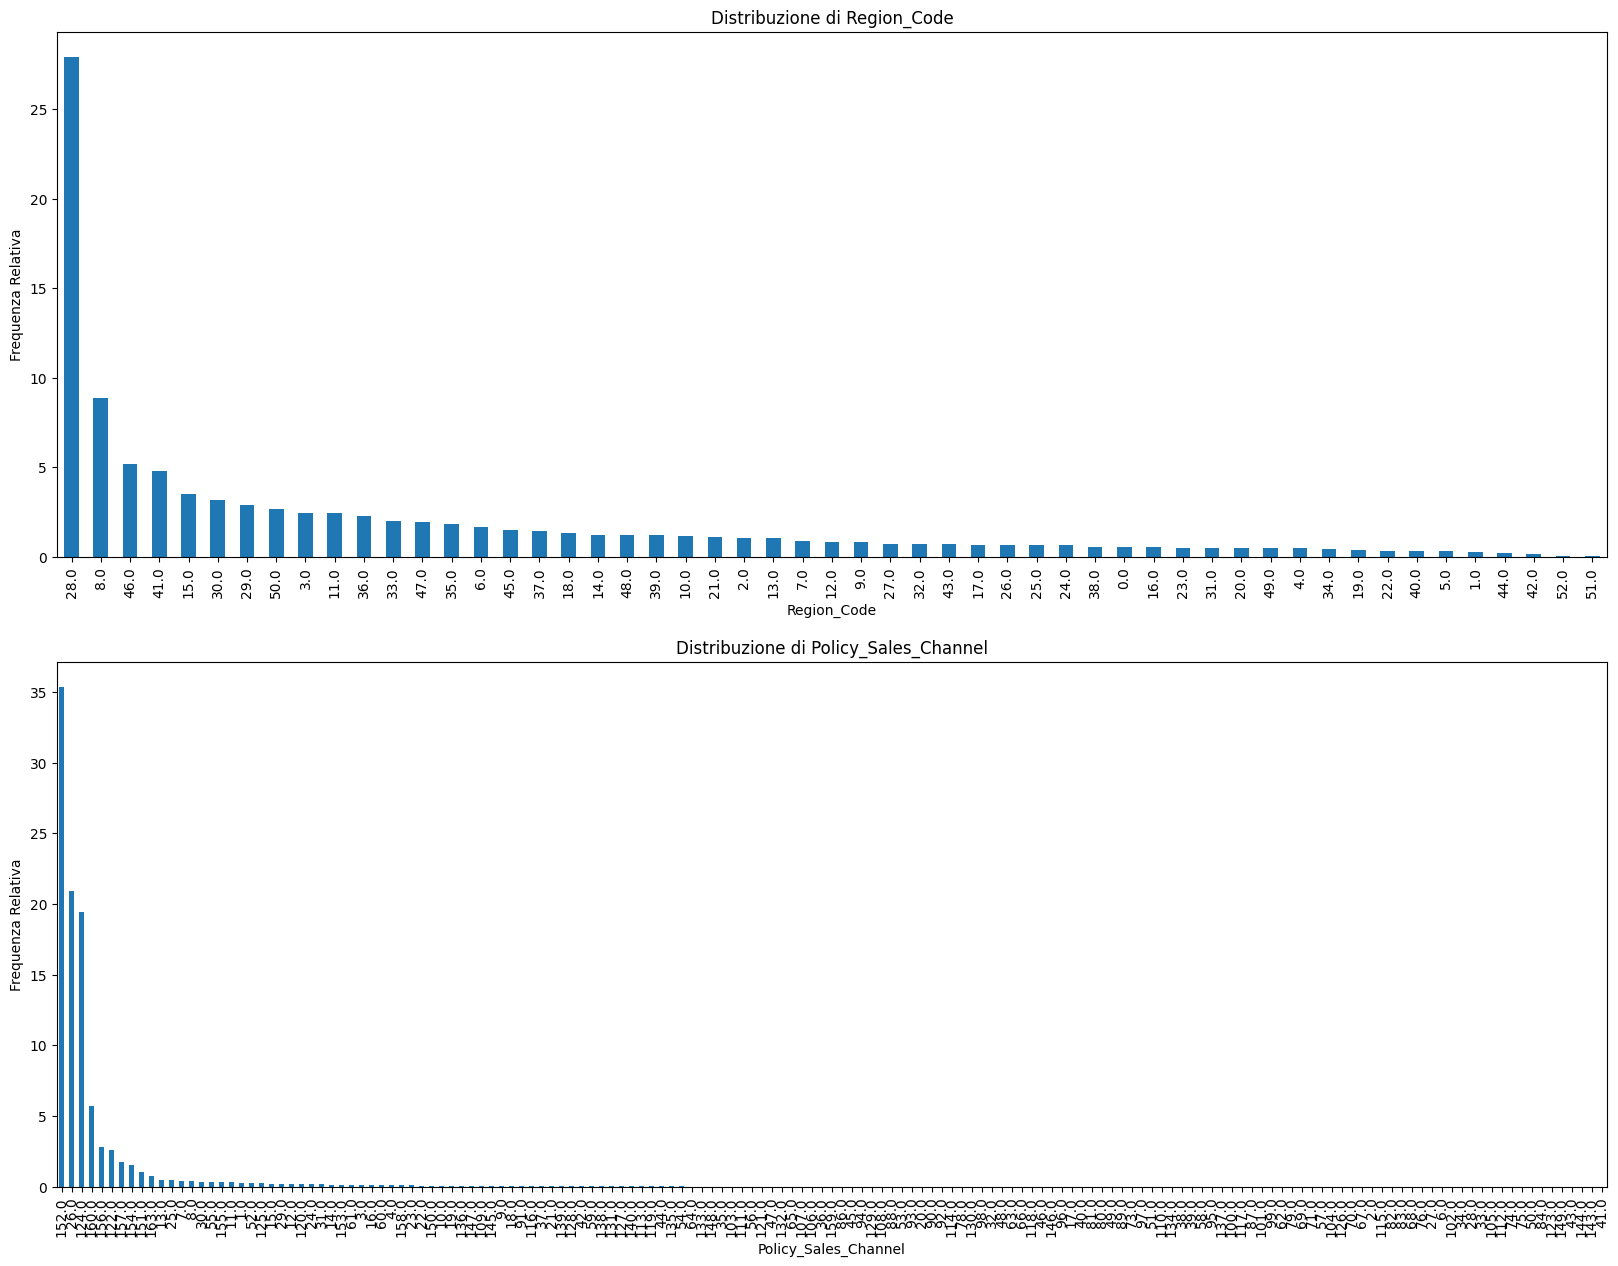

In [36]:
columns=['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Response']
num_entries = df.shape[0]

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
for i, column in enumerate(columns):
  row = i // 2
  col = i % 2
  counts_per = (df[column].value_counts()/num_entries)*100
  counts_per.plot(kind='bar', ax=axes[row, col])
  axes[row, col].set_title(f'Distribuzione di {column}')
  axes[row, col].set_xlabel(column)
  axes[row, col].set_ylabel('Frequenza Relativa')
  for i, value in enumerate(counts_per):
            axes[row, col].text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=10)


plt.tight_layout()
plt.show()

columns_RC_PS = ['Region_Code', 'Policy_Sales_Channel']
fix, axes = plt.subplots(2,1, figsize=(20,15))
for i, column in enumerate(columns_RC_PS):
  counts_per = (df[column].value_counts()/num_entries)*100
  counts_per.plot(kind='bar', ax=axes[i])
  axes[i].set_title(f'Distribuzione di {column}')
  axes[i].set_xlabel(column)
  axes[i].set_ylabel('Frequenza Relativa')

Questi istogrammi ci permettono di cogliere alcune caratteristiche del nostro dataset:

- **Gender**: i due sessi sono quasi equamente rappresentati.
- **Driving License**: quasi la totalità dei clienti ha la patente, questa variabile risulta quindi non avere informazioni rilevanti.
- **Previously Insured**: il 54% dei clienti non ha un veicolo assicurato.
- **Vehicle Age**: il 94% dei clienti ha veicoli con meno di due anni.
- **Region Code**: ci dice che la classe modale è molto più presente delle altre con circo il 28%.
- **Policy Sales Channel**: ci dice che alcuni pochi canali sono quelli più usati.
- **Vehicle Damage**: il 50% dei clienti ha subito danni o commesso incidenti col proprio veicolo.
- **Response**: l'88% dei clienti non ha accettato di comprare una polizza assicurativa per la propria macchina.

Per le variabili continue realizziamo sia un istogramma che un boxplot:

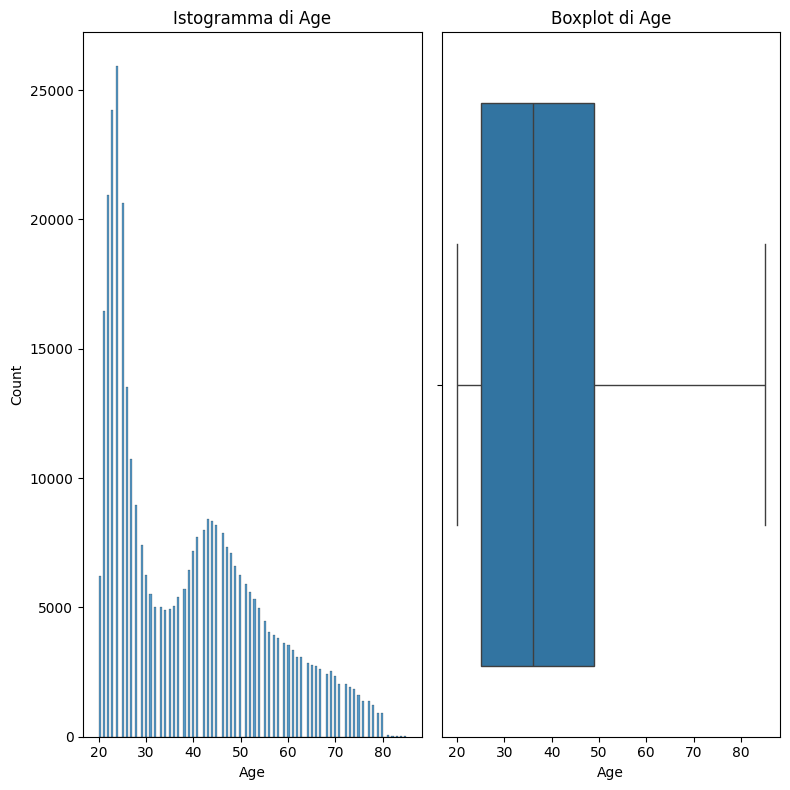

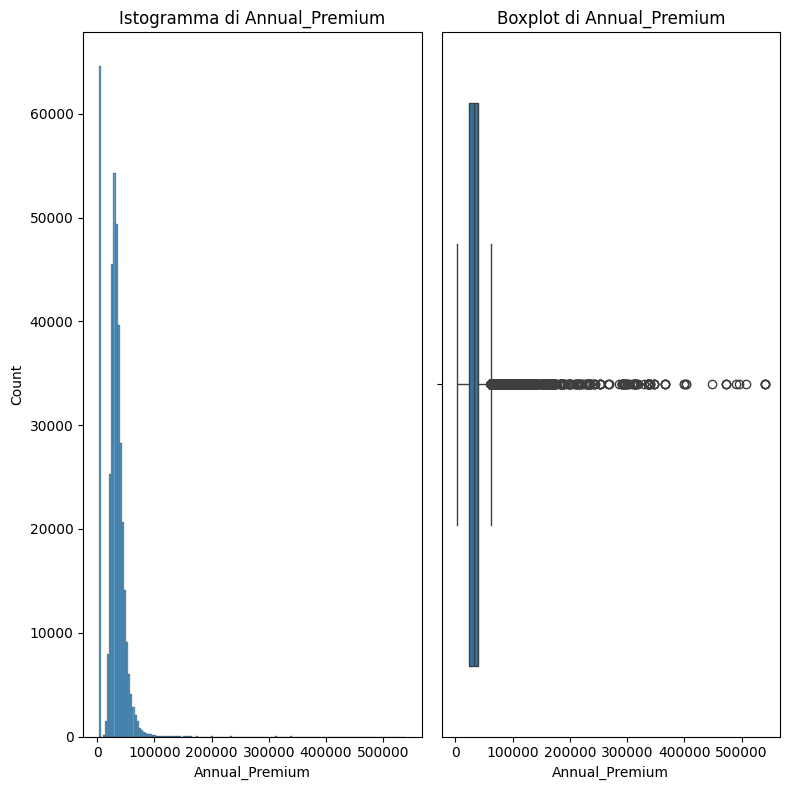

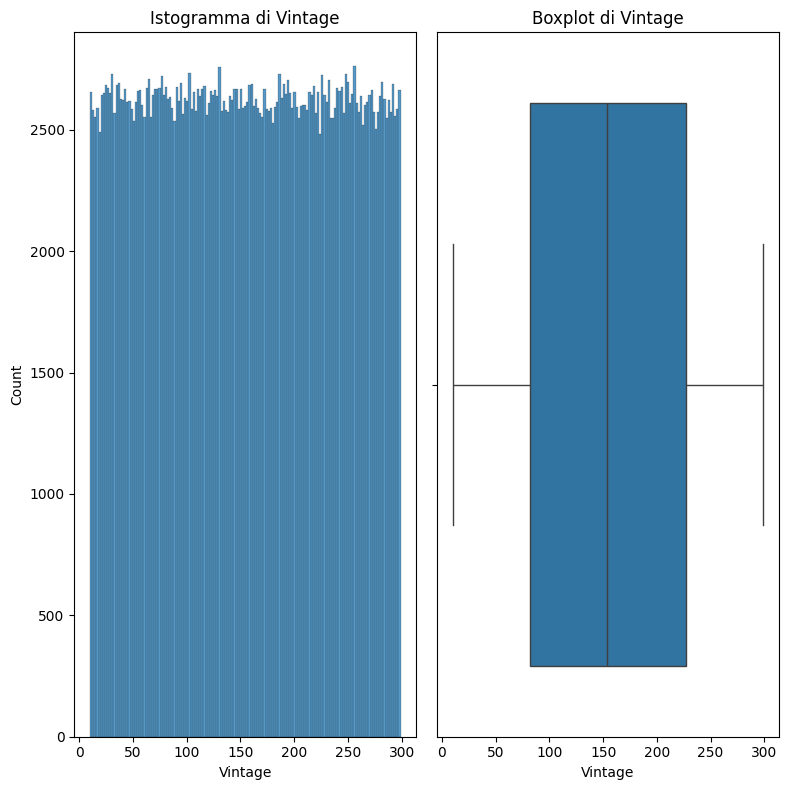

In [37]:
columns = ['Age', 'Annual_Premium', 'Vintage']

for column in columns:
  fig, axes = plt.subplots(1, 2, figsize=(8, 8))
  sns.histplot(data=df, x=df[column], bins = 'rice', ax=axes[0])
  axes[0].set_title(f'Istogramma di {column}')

  sns.boxplot(data=df, x=df[column],
               ax=axes[1])
  axes[1].set_title(f'Boxplot di {column}')
  plt.tight_layout()
  plt.show()

I grafici delle variabili quantitative ci danno le seguenti informazioni:

- **Age**: la distribuzione ha due picchi uno principale tra 20-30 anni e uno secondario tra 40-50. Il boxplot non presenta outlier.
- **Annual Premium**: La distribuzione ha una coda a destra molto ampia infatti anche dal describe possiamo notare come il terzo percentile sia 39400 mentre il massimo sia 540165.
- **Vintage**: la distribuzione è sostanzialmente piatta segno che sono stati raccolti campioni distribuiti uniformemente per quanto riguarda questa feature, vedremo nel confronto col target se questo è un segno di poca significatività della variabile stessa.

## 1.3 Analisi Multivariata per feature quantitative

Studio delle relazioni delle feature tra di loro e con il target.

Analizziamo prima le feature quantitative continue per cercare eventuali correlazioni:

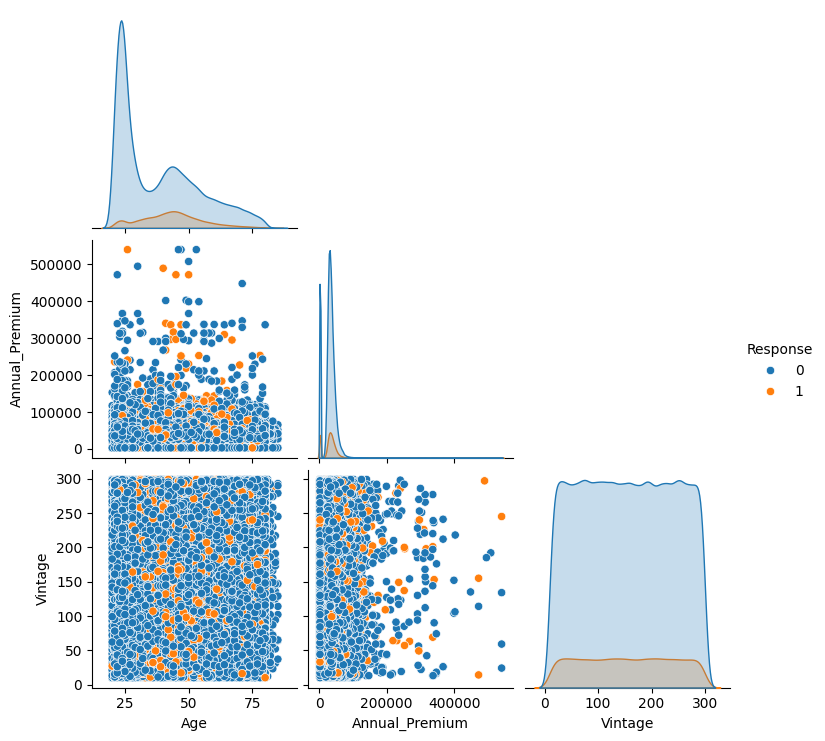

In [38]:
df_cont = df[['Age', 'Annual_Premium','Vintage','Response']]
sns.pairplot(df_cont, hue='Response', corner=True)

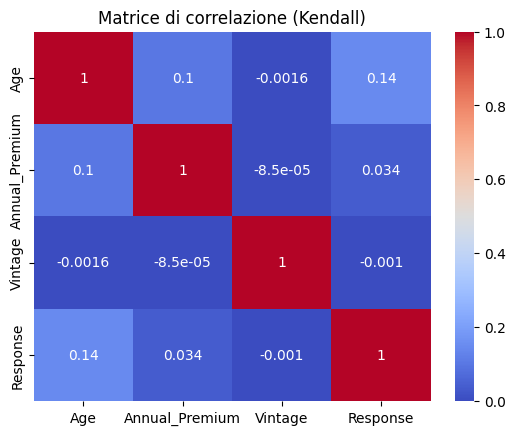

In [47]:
columns_of_interest = ['Age', 'Annual_Premium', 'Vintage', 'Response']
df_corr = df[columns_of_interest]
correlation_matrix = df_corr.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice di correlazione (Kendall)")
plt.show()

Questi grafici e la matrice di correlazione mostano che tra le features c'è una sostanziale assenza di correlazione, **Age** sembra quella che ha una relazione più forte con il target. una chiara correlazione delle variabili tra di loro e neanche un legame forte con il target. Verifichiamo se i boxplot di queste features presentano una dipendenza dal target.

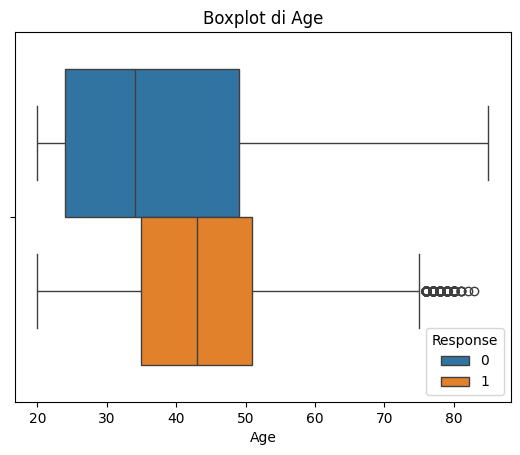

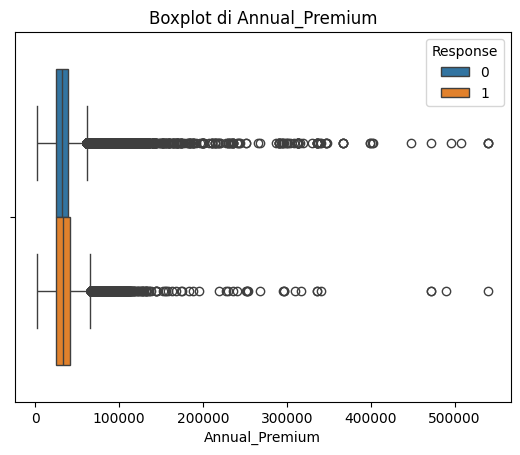

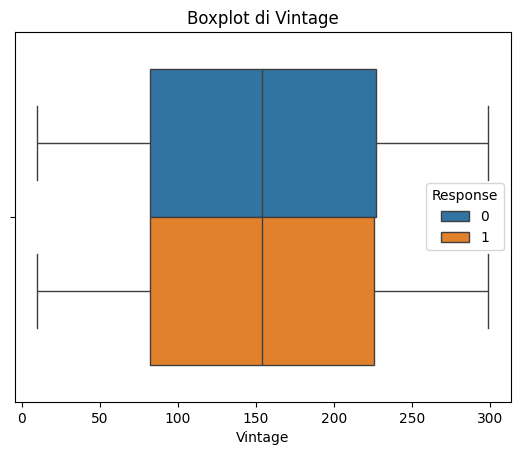

In [39]:
columns = ['Age', 'Annual_Premium', 'Vintage']

for column in columns:
  sns.boxplot(data=df, x=df[column], hue='Response')
  plt.title(f'Boxplot di {column}')
  plt.show()

### 1.3.A Test statistici su feature quantitative

Dai tre boxplot sembrerebbe che **Age** e **Annual Premium** mostrino una dipendenza dalla variabile target. Dobbiamo verificare se queste differenze sono statisticamente significative, facciamo questa verifica anche per **Vintage** come ulteriore verifica del dato visivamente osservato.

Usiamo il Mann-Whitney U test in quanto le distribuzioni non verificano l'ipotesi di normalità, quindi un t-test potrebbe dare risultati non adeguati. In questo test l'ipotesi H0 è che i due campioni provengano dalla stessa distribuzione.

In [40]:
from scipy.stats import mannwhitneyu

columns = ['Age', 'Annual_Premium', 'Vintage']

for col in columns:

  group1 = df[df['Response'] == 0][col]
  group2 = df[df['Response'] == 1][col]

# Mann-Whitney U Test
  stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
  print(f"{col}: Mann-Whitney U Test: p-value = {p_value}")

  if p_value < 0.05:
      print(f"{col} dipende significativamente da Response.\n")
  else:
      print(f"Non c'è evidenza che {col} dipenda da Response.\n")


Age: Mann-Whitney U Test: p-value = 0.0
Age dipende significativamente da Response.

Annual_Premium: Mann-Whitney U Test: p-value = 2.319943559689334e-97
Annual_Premium dipende significativamente da Response.

Vintage: Mann-Whitney U Test: p-value = 0.5222125716438006
Non c'è evidenza che Vintage dipenda da Response.



Il risultato del test conferma che c'è una dipendenza da **Response** sia per quanto riguarda l'età (chi ha accettato la proposta ha una età statisticamente maggiore di chi non l'ha accettata) che per quanto riguarda il premio annuale.

## 1.4 Analisi Multivariata per feature qualitative

Per rappresentare il legame con il target di ogni singola classe usiamo il barplot con le barre normalizzate a uno.

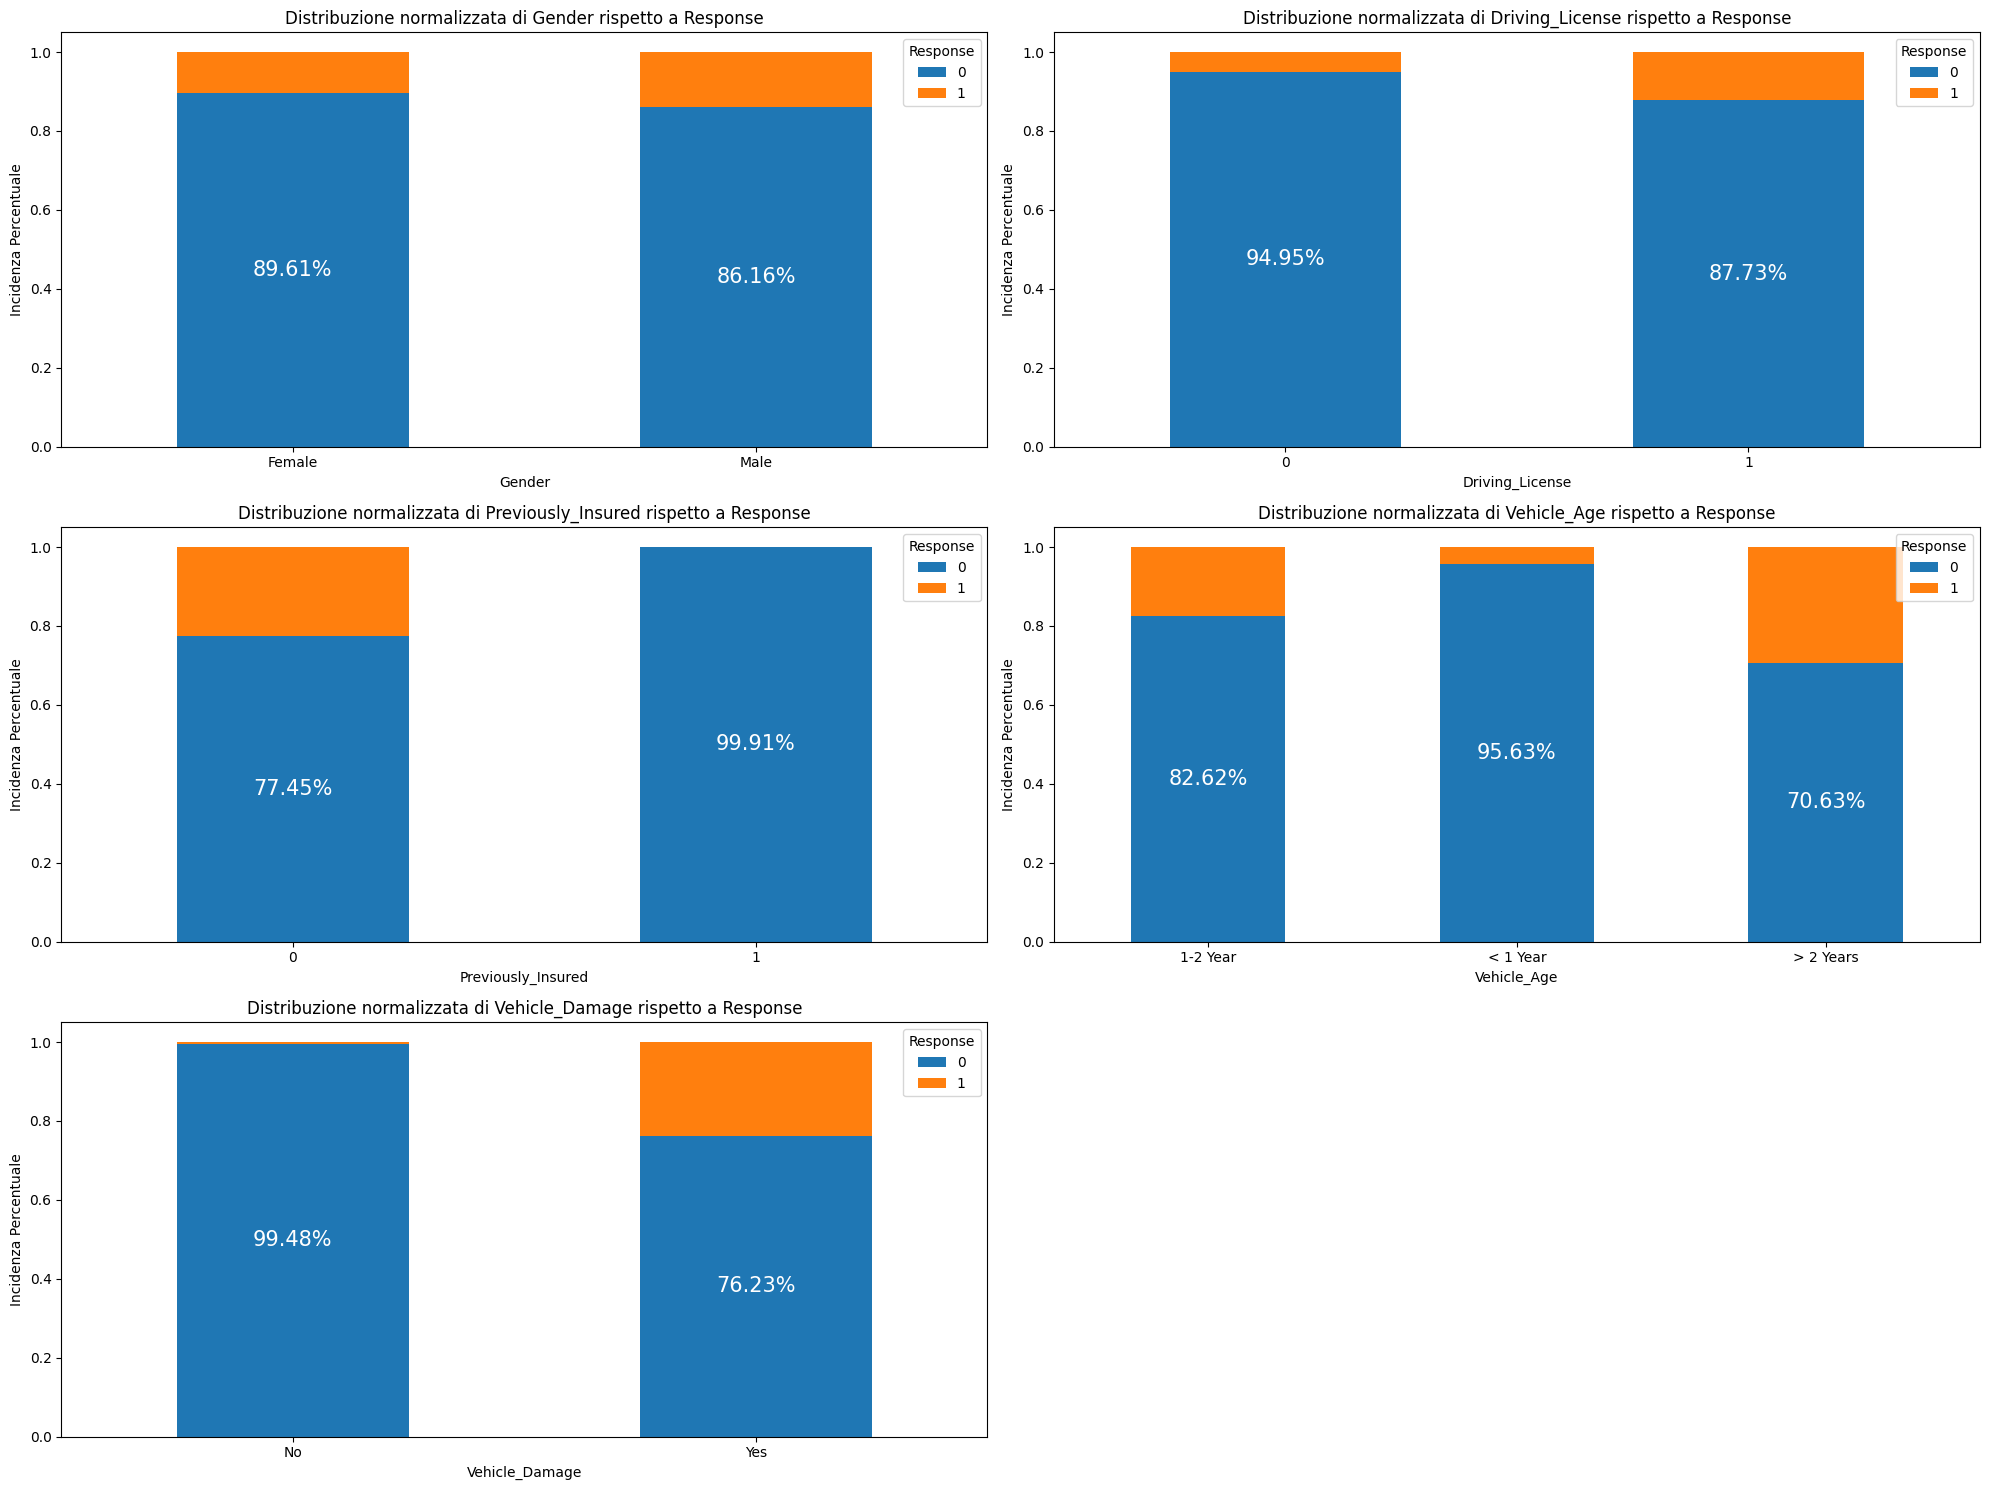

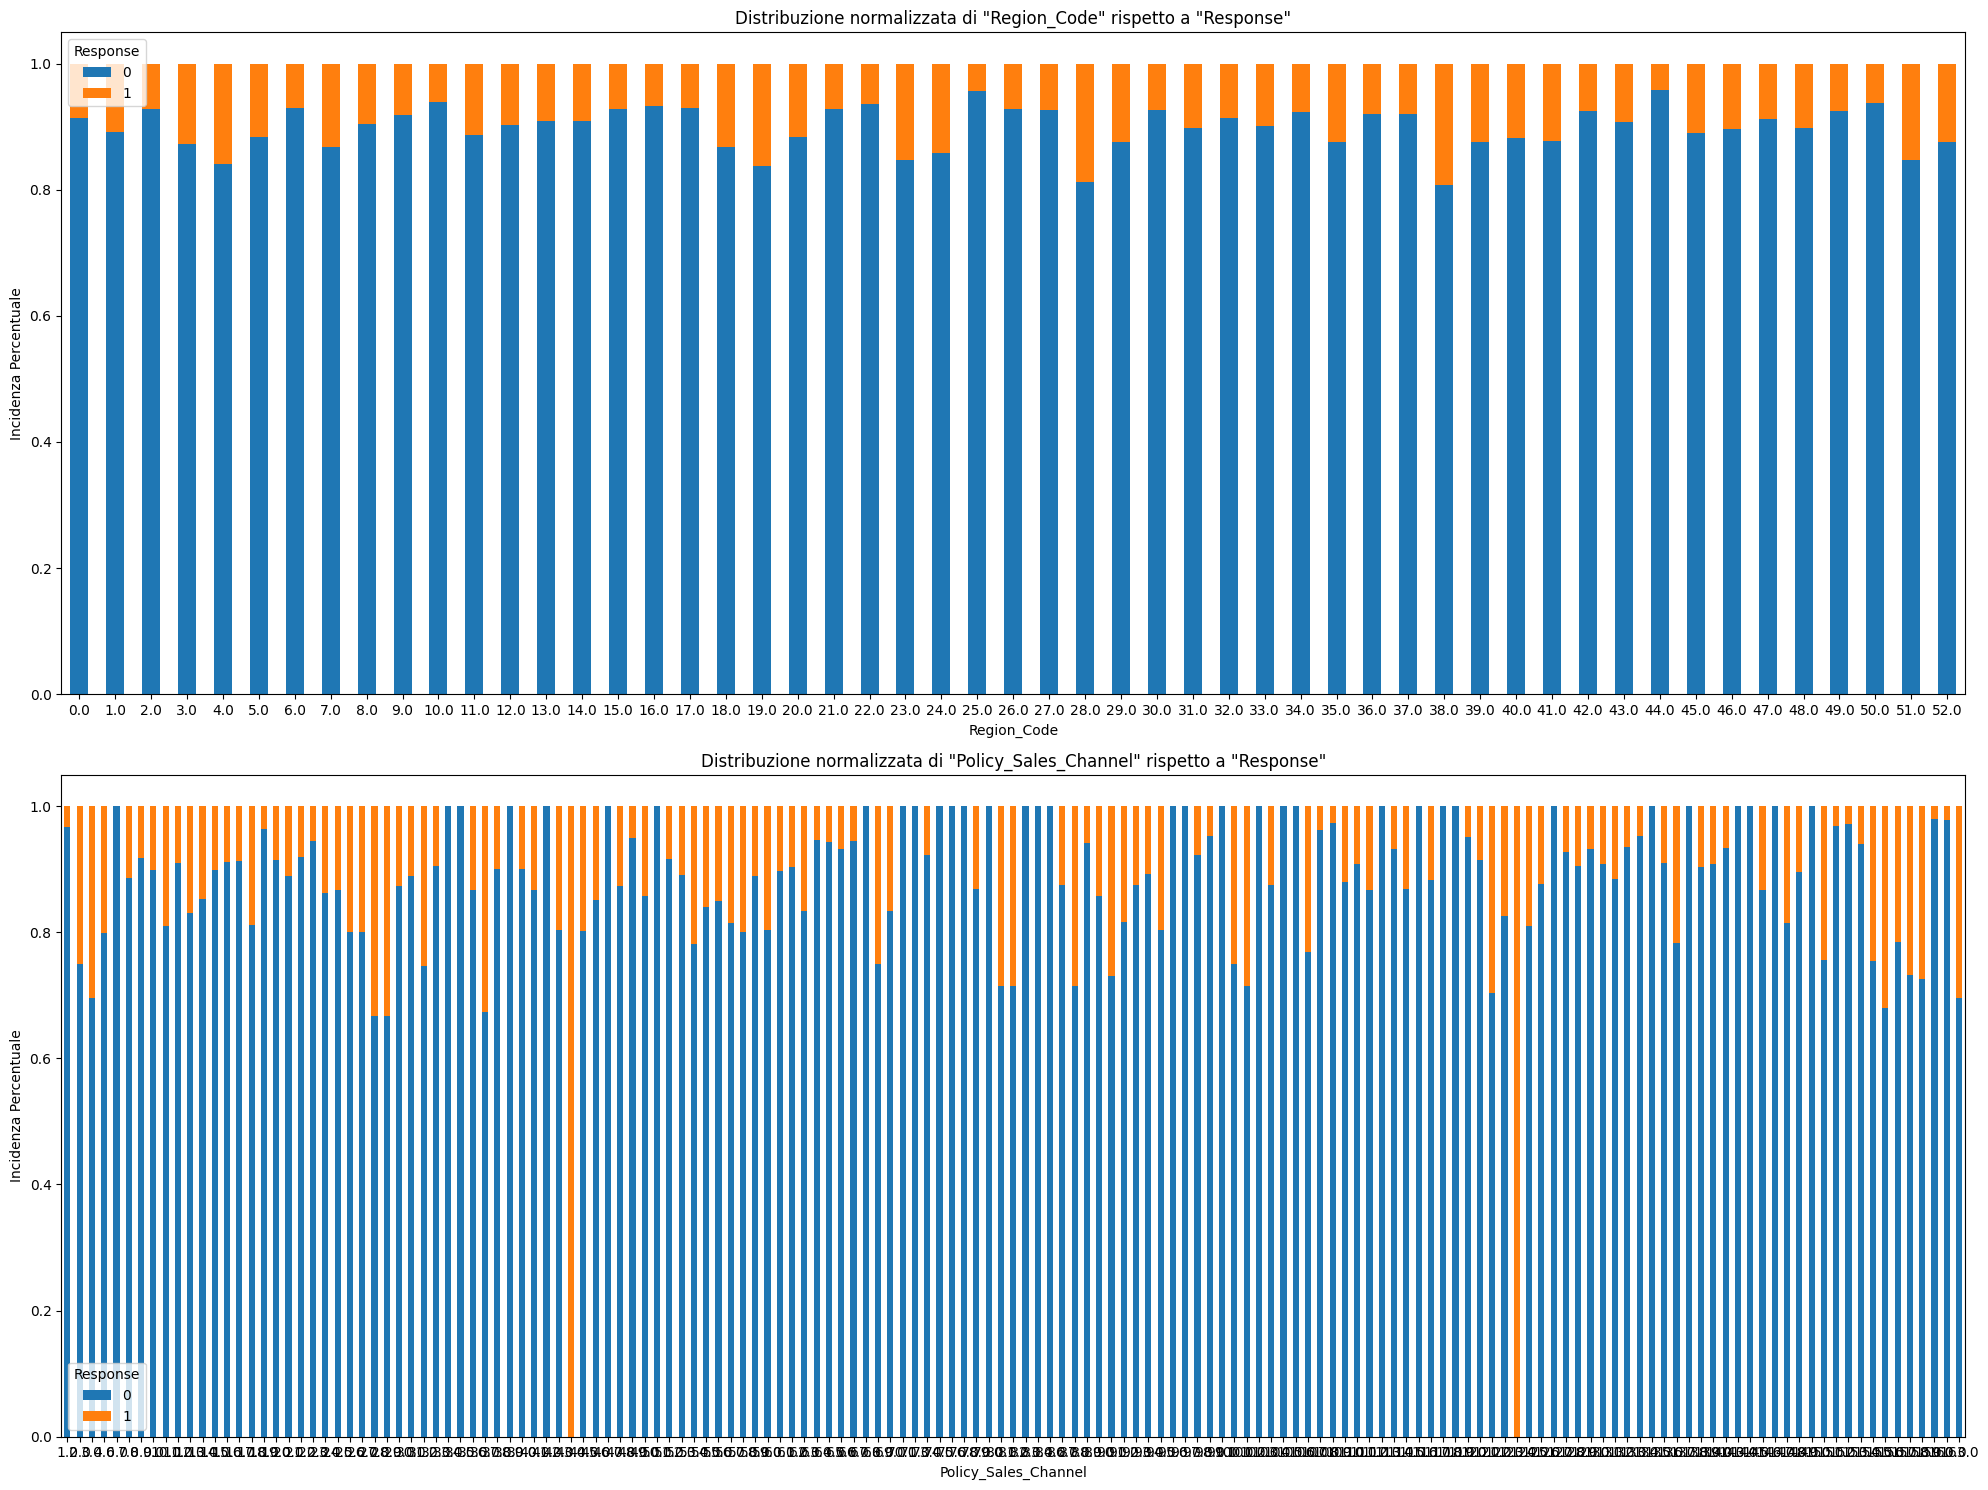

In [41]:
columns = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

# Creazione della figura e degli assi
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # 3 righe, 2 colonne per adattare 5 grafici
axes = axes.ravel()  # Per iterare facilmente sugli assi

# Ciclo sulle colonne e creazione dei grafici
for i, col in enumerate(columns):
    # Creazione della tabella di contingenza
    contingency_table = pd.crosstab(df[col], df['Response'])

    # Normalizzazione della tabella per riga
    contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

    # Plot delle distribuzioni normalizzate
    bars = contingency_table_normalized.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Distribuzione normalizzata di {col} rispetto a Response')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Incidenza Percentuale')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].legend(title='Response')

    for bar_group, label in zip(bars.containers, contingency_table.columns):
        if label == 0:  # Annotazione solo per Response = 1
            for bar in bar_group:
                height = bar.get_height()
                if height > 0:  # Annotazione solo se c'è un valore visibile
                    x_pos = bar.get_x() + bar.get_width() / 2  # Posizione centrale della barra
                    axes[i].text(
                        x=x_pos,
                        y=height / 2,  # Posizione verticale (al centro della barra)
                        s=f"{height:.2%}",  # Valore percentuale (con 2 decimali)
                        ha='center',  # Allineamento orizzontale
                        va='center',  # Allineamento verticale
                        fontsize=15,  # Dimensione del font
                        color='white'  # Colore del testo per visibilità
                    )

# Rimozione degli assi inutilizzati (se le colonne sono dispari)
if len(columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Layout del grafico
plt.tight_layout()
plt.show()

columns_RC_PS = ['Region_Code', 'Policy_Sales_Channel']
fix, axes = plt.subplots(2,1, figsize=(20,15))
for i, col in enumerate(columns_RC_PS):
  contingency_table = pd.crosstab(df[col], df['Response'])

    # Normalizzazione della tabella per riga
  contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

    # Plot delle distribuzioni normalizzate
  contingency_table_normalized.plot(kind='bar', stacked=True, ax=axes[i])
  axes[i].set_title(f'Distribuzione normalizzata di "{col}" rispetto a "Response"')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Incidenza Percentuale')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
  axes[i].legend(title='Response')


plt.tight_layout()
plt.show()

Questi grafici sono molto interessanti perché ci mostrano come tutte le classi sono popolate e in tutte le classi sono presenti clienti che hanno accettato la proposta.

Su **Policy Sales Channel** ci sono due canali che sembrano estremamente efficace, dovremmo verificare se effettivamente la percentuale di risposta è del 100% e quanti sono i campioni relativi a quel canale.

Notiamo anche che chi non ha avuto il veicolo danneggiato al 99,5% risponderà di no alla proposta e chi è già assicurato al 99,9% dovremmo valutare se considerarle come un filtro iniziale sull'utilizzo del modello.

### 1.4.A Test statistici su feature qualitative

Anche in questo caso svolgiamo dei test statistici (chi-quadro) per verificare quanto osservato dai nostri istogrammi.

In [43]:
from scipy.stats import chi2_contingency

columns = ['Gender','Previously_Insured', 'Vehicle_Age',
          'Vehicle_Damage', 'Region_Code', 'Policy_Sales_Channel', 'Driving_License']

for col in columns:
    # Creazione della tabella di contingenza
    contingency_table = pd.crosstab(df[col], df['Response'])

    # Test del chi-quadro
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Feature: {col}")
   # print(f"Chi-squared: {chi2:.2f}")
    print(f"p-value: {p_value:}")
    #print(f"Degrees of freedom: {dof}")
   # print(f"Expected frequencies: {expected}")

    # Interpretazione del p-value
    if p_value < 0.05:
        print(f"\n Esiste un'associazione significativa tra '{col}' e 'Response' (p < 0.05).")
    else:
        print(f"\n Non c'è evidenza di un'associazione significativa tra '{col}' e 'Response' (p >= 0.05).")
    print("-" * 50)

Feature: Gender
p-value: 5.3788975019355325e-230

 Esiste un'associazione significativa tra 'Gender' e 'Response' (p < 0.05).
--------------------------------------------------
Feature: Previously_Insured
p-value: 0.0

 Esiste un'associazione significativa tra 'Previously_Insured' e 'Response' (p < 0.05).
--------------------------------------------------
Feature: Vehicle_Age
p-value: 0.0

 Esiste un'associazione significativa tra 'Vehicle_Age' e 'Response' (p < 0.05).
--------------------------------------------------
Feature: Vehicle_Damage
p-value: 0.0

 Esiste un'associazione significativa tra 'Vehicle_Damage' e 'Response' (p < 0.05).
--------------------------------------------------
Feature: Region_Code
p-value: 0.0

 Esiste un'associazione significativa tra 'Region_Code' e 'Response' (p < 0.05).
--------------------------------------------------
Feature: Policy_Sales_Channel
p-value: 0.0

 Esiste un'associazione significativa tra 'Policy_Sales_Channel' e 'Response' (p < 0.05).
-

Il test del chi-quadro ci restituisce che le feature considerate hanno un'associazione significativa con **Response**.

Questa fase di analisi descrittiva ci ha permesso di osservare come tutte le nostre features sono portatrici d'informazione esclusa **Vintage** il cui test del t-student non ci ha fatto rigettare l'ipotesi nulla.

Per quanto riguarda le 3 feature segnalate dal cliente come significative abbiamo determinato come per premi annuali più alti sia maggiore la probabilità di acquistare la nuova polizza, lo stesso dicasi per l'età del veicolo, mentre chi ha gia un veicolo assicurato al 99,9% rifiuterà la proposta.

# 2. Costruzione del modello predittivo

## 2.1 Preprocessing: Mapping feature, Spliting del dataset, Standardizzazione

In [48]:
map_gender = {"Male":1, "Female":0}
df["Gender"] = df["Gender"].map(lambda x: map_gender[x])

map_vehicle_age = {"< 1 Year": 0, "1-2 Year": 1, "> 2 Years":2}
df["Vehicle_Age"] = df["Vehicle_Age"].map(lambda x: map_vehicle_age[x])

map_vehicle_damage = {"No": 0, "Yes": 1}
df["Vehicle_Damage"] = df["Vehicle_Damage"].map(lambda x: map_vehicle_damage[x])

df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [52]:
RANDOM_SEED = 42

X = df.drop(['Response', 'Vintage'], axis=1).values
y = df["Response"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)
print(X_train.shape)
print(X_test.shape)

(266588, 9)
(114252, 9)


Verifichiamo che X_train e X_test siano campioni rappresentativi del dataset, cioè che abbiano le stesse caratteristiche, per questo scopo usiamo il test di Kolmogorov-Smirnov:

In [53]:
from scipy.stats import ks_2samp

stat, p_value = ks_2samp(X_train.flatten(), X.flatten())

print("Verifica distribuzione per X_train")
print(f"Statistiche K-S: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rifiutiamo l'ipotesi nulla: le distribuzioni sono diverse.\n")
else:
    print("Non rifiutiamo l'ipotesi nulla: le distribuzioni sono uguali.\n")


stat, p_value = ks_2samp(X_test.flatten(), X.flatten())
print("\nVerifica distribuzione per X_test")
print(f"Statistiche K-S: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rifiutiamo l'ipotesi nulla: le distribuzioni sono diverse.\n")
else:
    print("Non rifiutiamo l'ipotesi nulla: le distribuzioni sono uguali.\n")


Verifica distribuzione per X_train
Statistiche K-S: 0.0002
P-value: 1.0000
Non rifiutiamo l'ipotesi nulla: le distribuzioni sono uguali.


Verifica distribuzione per X_test
Statistiche K-S: 0.0005
P-value: 0.9883
Non rifiutiamo l'ipotesi nulla: le distribuzioni sono uguali.



Abbiamo verificato che X_train e X_test sono due campioni coerenti con il dataset originale.

In [54]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## 2.2 Preparazione del modello senza bilanciamento delle classi

Il nostro modello dovrà essere in grado di predire i clienti predisposti alla sottoscrizione di una polizza. Dato l'obiettivo del progetto sarà un errore più grave un falso negativo, piuttosto che un falso positivo. Un falso negativo sarebbe un possibile cliente perso. Sarà importante cercare di massimizzare la metrica **Recall** e la **Precision**.

- Definire modello con (Logistic Regression Lasso)
- Ricerca della soglia migliore usando F1 perché è la metrica da massimizzare in quanto dipende sia da recall che da precision
- Settaggio della soglia scelta
- Cross validation solo con X_train per vedere l'overfitting (con Recall e Precision)
- Roc_Curve per stima grafica delle performance del mio modello
- Learning curve per X_train e X_test
- Confusion matrix per X_train e X_test
- Heatmap della confusion matrix con stampa dei valori e di precision e Recall

questo ripetuto prima senza gestione classi non bilanciate, poi con classweights=balanced, poi facendo oversampling, undersampling e smote, quindi alla fine confronterò 5 modelli.

Definiamo una classe che possa permetterci di ottimizzare il processo.

In [ ]:
cl

In [55]:
lr1a = LogisticRegression()
lr1a.fit(X_train, y_train)

LogisticRegression()

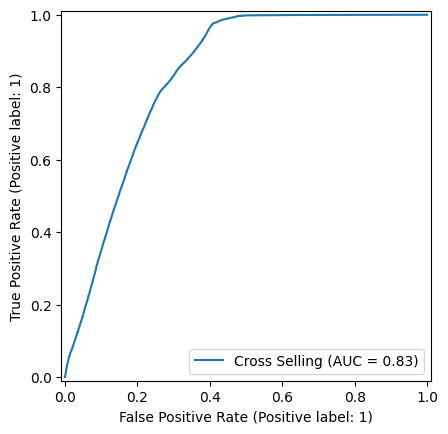

In [57]:
RocCurveDisplay.from_estimator(lr1a, X_train, y_train, name="Cross Selling")

In [58]:
y_pred_train = lr1a.predict(X_train)
y_proba_train = lr1a.predict_proba(X_train)
y_pred_test = lr1a.predict(X_test)
y_proba_test = lr1a.predict_proba(X_test)

In [68]:
y_pred_train = np.where(y_proba_train[:,1]>0.45, 1, 0) #in questo modo cambio la soglia a cui associo la classe 1
y_pred_test = np.where(y_proba_test[:,1]>0.45, 1, 0)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold

# Variabili per salvare le metriche
precision_train = []
recall_train = []
f1_train = []
roc_auc_train = []
precision_test = []
recall_test = []
f1_test = []
roc_auc_test = []
thres = 0.20

kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Modifica il random_state se necessario

for train_index, test_index in kf.split(X_train):
    # Split dei dati
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    # Standardizzazione
    ss = StandardScaler()
    X_train_cv = ss.fit_transform(X_train_cv)
    X_test_cv = ss.transform(X_test_cv)

    # Modello Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_cv, y_train_cv)

    # Predizioni
    y_train_probs_cv = model.predict_proba(X_train_cv)[:, 1]
    y_train_pred_cv = np.where(y_train_probs_cv > thres, 1, 0)  # Cambio soglia a 0.45

    y_test_probs_cv = model.predict_proba(X_test_cv)[:, 1]  # Probabilità per la classe positiva
    y_test_pred_cv = np.where(y_test_probs_cv > thres, 1, 0)

    # Calcolo delle metriche
    precision_test.append(precision_score(y_test_cv, y_test_pred_cv))
    precision_train.append(precision_score(y_train_cv, y_train_pred_cv))
    recall_test.append(recall_score(y_test_cv, y_test_pred_cv))
    recall_train.append(recall_score(y_train_cv, y_train_pred_cv))
    f1_test.append(f1_score(y_test_cv, y_test_pred_cv))
    f1_train.append(f1_score(y_train_cv, y_train_pred_cv))
    roc_auc_test.append(roc_auc_score(y_test_cv, y_test_probs_cv))
    roc_auc_train.append(roc_auc_score(y_train_cv, y_train_probs_cv))

# Risultati finali
scores = {
    "precision_train": np.array(precision_train),
    "recall_train": np.array(recall_train),
    "f1_train": np.array(f1_train),
    "roc_auc_train": np.array(roc_auc_train),
    "precision_test": np.array(precision_test),
    "recall_test": np.array(recall_test),
    "f1_test": np.array(f1_test),
    "roc_auc_test": np.array(roc_auc_test)
}

# Calcolo e stampa delle metriche medie per il train e il test
print("\nMetriche medie e deviazioni standard (Train):")
for metric, values in scores.items():
    if "train" in metric:
        print(f"{metric}: {values.mean():.4f} ± {values.std():.4f}")

print("\nMetriche medie e deviazioni standard (Test):")
for metric, values in scores.items():
    if "test" in metric:
        print(f"{metric}: {values.mean():.4f} ± {values.std():.4f}")



Metriche medie e deviazioni standard (Train):
precision_train: 0.2910 ± 0.0004
recall_train: 0.8022 ± 0.0013
f1_train: 0.4271 ± 0.0004
roc_auc_train: 0.8326 ± 0.0003

Metriche medie e deviazioni standard (Test):
precision_test: 0.2908 ± 0.0042
recall_test: 0.8018 ± 0.0046
f1_test: 0.4268 ± 0.0046
roc_auc_test: 0.8326 ± 0.0024


In [65]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    233813
           1       0.43      0.02      0.04     32775

    accuracy                           0.88    266588
   macro avg       0.66      0.51      0.49    266588
weighted avg       0.82      0.88      0.82    266588



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100195
           1       0.25      0.98      0.40     14138

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precisione_recall=False):

  cm = confusion_matrix(y_true, y_pred) #tn, fp, fn, tp
  df_cm = pd.DataFrame(cm, index = labels,
                       columns = ["Predicted "+labels[0], "Predicted "+labels[1]])

  sns.heatmap(df_cm, annot=True, fmt='g')

  if show_precisione_recall:
    plt.text(0, -0.1, f"Precision: {cm[1][1]/(cm[1][1]+cm[0][1]):.3f}")
    plt.text(1, -0.1, f"Recall: {cm[1][1]/(cm[1][1]+cm[1][0]):.3f}")

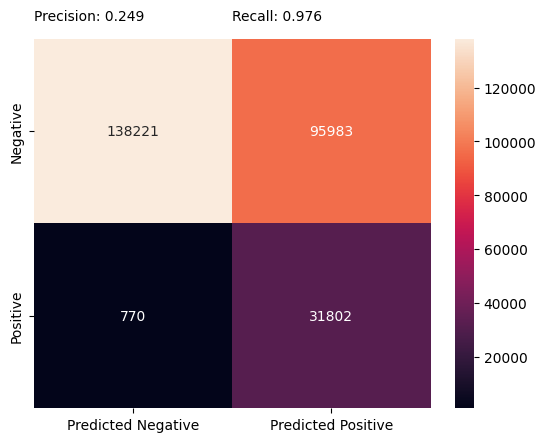

In [ ]:
plot_confusion_matrix(y_train, y_pred_train, show_precisione_recall=True)

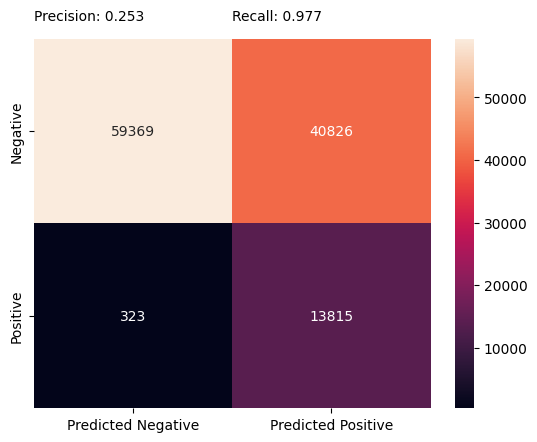

In [ ]:
plot_confusion_matrix(y_test, y_pred_test, show_precisione_recall=True)

Usiamo l'attributo class_weight = 'balanced' per tenerse conto che nel nostro dataset le classi in response sono fortemente sbilanciate (No = 88%, Si = 12%)